In [1]:
# Dependencies
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Get the summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# plot the data
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

## Data Preparation

##### Normalize the Data with `StandardScaler()`

In [5]:
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df)

# predict/transform
scaled_data = scaler.transform(df)

# Create a list to store the coin_id index values from the original DataFrame
coin_id = df.index

# Create a list to store the column names
columns = df.columns

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, index=coin_id, columns=columns)

# Display the first 5 rows of the data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


## Find the best k-value with the Original Data

In [6]:
# define X
X = df_scaled

In [7]:
# Run KMeans, Silhouette Score, and Calinski-Harabasz Score
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
# Minimum value needs to be 2 because of the Silhouette Score
k = list(range(2, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)

    # Get the Silhouette Score
    score = silhouette_score(X, preds)
    silhouettes.append(score)

    # Get the Calinski_Harabasz Score
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [8]:
# Define a DataFrame to hold the values for k and the corresponding inertia
data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow_plus = pd.DataFrame(data)

df_elbow_plus["acc"] = df_elbow_plus.inertia.diff()

# Review the DataFrame
df_elbow_plus.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,63.858668,0.329023,31.448698,-15.163768
4,6,53.057788,0.287883,30.864375,-10.800879
5,7,44.406791,0.290874,30.956861,-8.650998
6,8,37.078233,0.205692,31.776126,-7.328557
7,9,32.832187,0.258600,30.965687,-4.246046
8,10,28.165433,0.244422,31.653739,-4.666754
9,11,24.964638,0.229807,31.488784,-3.200795


Looking at the above table, a k-value of 3 is likely the best based on the Silhouette Score

##### K-Means for k w/ range 1 to 11

In [9]:
# Run KMeans
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
# Minimum value needs to be 2 because of the Silhouette Score
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)

    print(f"Finished {i} out of {max(k)}")

Finished 1 out of 10
Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [10]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(10)

,k,inertia,acc
0,1,287.000000,NaN
1,2,195.820218,-91.179782
2,3,123.190482,-72.629736
3,4,79.022435,-44.168046
4,5,63.858668,-15.163768
5,6,53.057788,-10.800879
6,7,44.406791,-8.650998
7,8,37.078233,-7.328557
8,9,32.832187,-4.246046
9,10,28.165433,-4.666754


In [11]:
# Create the Elbow Curve plot
# Plot the DataFrame
orig_elbow_plot = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Original Elbow Curve",
    xticks = k
)
orig_elbow_plot

:Curve   [k]   (inertia)

##### Best k-value for the original data: Looking at the Elbow Curve, it's hard to tell between 3 and 4 for the best k-value. This is confirmed by looking at the Silhouette Score and CHA. The Silhouette Score indicates that 3 is the best k-value, but the CHA score shows that 4 is likely the best value
The elbow curve looks like `4` is the best value for k, so we will use that

## Cluster the Cryptocurrencies with K-means for the original data

In [12]:
# Copying the scaled DataFrame
df_sub = df_scaled.copy()

# Re-inititializing X
X = df_scaled

In [13]:
# Define the model with the higher value of k clusters
# Using a random_state of 1 to generate the model

# Best k-value looks to be 4, so using that
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Show the array of predicted values
display(preds)

# Add a column to the df_scaled with the cluster predictions
df_sub2 = df_sub.copy()
df_sub2['clusters'] = preds

df_sub2.head()

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [14]:
orig_scatter_plot = df_sub2.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols="coin_id",
    title="Original Data Scatter Plot"
)
orig_scatter_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

## Use Principal Component Analysis to Optimize Clusters

##### PCA model through all columns in the scaled df

In [15]:
# Fit model through a PCA
# going to use the total number of columns in the scaled dataframe

n_components = len(df_scaled.columns)
pca1=PCA(n_components=n_components)

# Fit the PCA model on the transformed credit card DataFrame
pca_data1 = pca1.fit_transform(df_scaled)
df_pca1 = pd.DataFrame(pca_data1, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

df_pca1.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


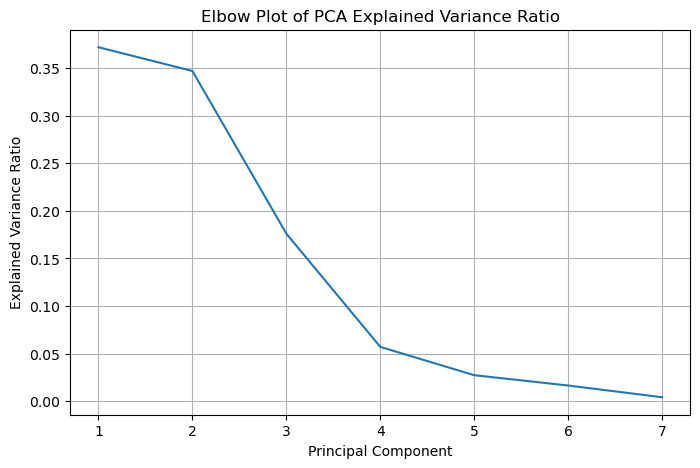

In [16]:
# explained variation ratio
explained_variance_ratio1 = pca1.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio1
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [17]:
# Do we need to drop columns?
sum(explained_variance_ratio1[0:3])

0.895031657030984

Total explained variance of the 1st 3 Principal components is approximately 90%\
Would likely be better to use more principal components

##### PCA model with `n_components=3`

In [18]:
# Fit model through a PCA
pca=PCA(n_components=3)

# Fit the PCA model on the transformed credit card DataFrame
pca_data = pca.fit_transform(df_scaled)

# Create a list to store the coin_id index values from the original DataFrame
coin_id = df.index

# Create the dataframe to store the PCA values
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, 4)], index=coin_id)

df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


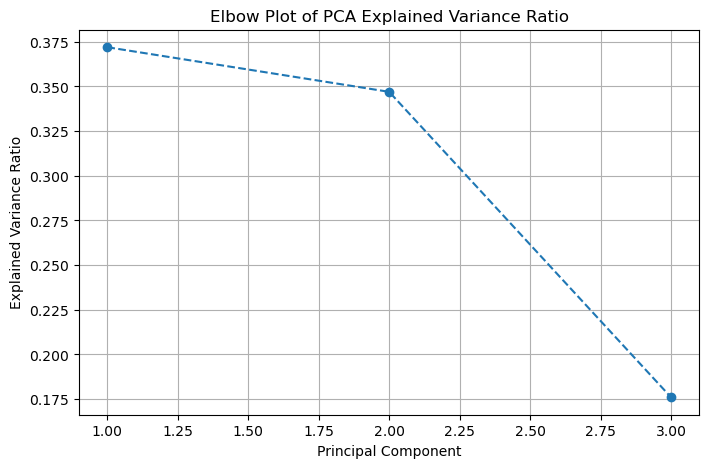

In [19]:
# explained variation ratio
# Do we need to reduce the dimensions...
# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, 4),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [20]:
sum(explained_variance_ratio)

0.895031657030984

##### Total explained variance of the 3 principal components: `0.895 (or roughly 90%)`

In [21]:
# Show the PCA df with the coin_ids as the index
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


## Find the best k-value with the PCA Data
All information found using the pca where `n_components=3` NOT where `n_components=len(df_scaled)`

In [22]:
# define X
X = df_pca

In [23]:
# Run KMeans, Silhouette Score, and Calinski-Harabasz Score
# Create a a list to store inertia values
inertia = []
silhouettes = []
cha_chas = []

# Create a a list to store the values of k
# Minimum value needs to be 2 because of the Silhouette Score
k = list(range(2, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)

    # Get the Silhouette Score
    score = silhouette_score(X, preds)
    silhouettes.append(score)

    # Get the Calinski_Harabasz Score
    cha_cha = calinski_harabasz_score(X, preds)
    cha_chas.append(cha_cha)
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 19
Finished 3 out of 19
Finished 4 out of 19
Finished 5 out of 19
Finished 6 out of 19
Finished 7 out of 19
Finished 8 out of 19
Finished 9 out of 19
Finished 10 out of 19
Finished 11 out of 19
Finished 12 out of 19
Finished 13 out of 19
Finished 14 out of 19
Finished 15 out of 19
Finished 16 out of 19
Finished 17 out of 19
Finished 18 out of 19
Finished 19 out of 19


In [24]:
# Define a DataFrame to hold the values for k and the corresponding inertia
data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas}
df_elbow_plus = pd.DataFrame(data)

df_elbow_plus["acc"] = df_elbow_plus.inertia.diff()

# Review the DataFrame
df_elbow_plus.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,165.901994,0.693036,21.385587,NaN
1,3,93.774626,0.741509,33.046144,-72.127368
2,4,49.665497,0.420800,51.455694,-44.109129
3,5,38.072792,0.359902,51.722281,-11.592705
4,6,27.720626,0.401468,57.865728,-10.352166
5,7,21.145312,0.372585,63.172223,-6.575314
6,8,17.208546,0.319029,65.656439,-3.936766
7,9,13.719376,0.372308,70.893808,-3.489169
8,10,10.559358,0.333616,80.347445,-3.160019
9,11,8.058822,0.361557,92.624679,-2.500536


Looking at the above table, a k-value of 3 is likely the best based on the Silhouette Score. The CHA Score does not look to provide any useful insight

##### K-Means for k w/ range 1 to 11

In [25]:
# Run KMeans
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
# Minimum value needs to be 2 because of the Silhouette Score
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    # initialize the model
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # fit the model
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # evaluate the model (generate the metics)
    inertia.append(k_model.inertia_)

    print(f"Finished {i} out of {max(k)}")

Finished 1 out of 10
Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [26]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff()

# Review the DataFrame
df_elbow.head(10)

,k,inertia,acc
0,1,256.874086,NaN
1,2,165.901994,-90.972092
2,3,93.774626,-72.127368
3,4,49.665497,-44.109129
4,5,38.072792,-11.592705
5,6,27.720626,-10.352166
6,7,21.145312,-6.575314
7,8,17.208546,-3.936766
8,9,13.719376,-3.489169
9,10,10.559358,-3.160019


In [27]:
# Plot the DataFrame
pca_elbow_plot = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="PCA Elbow Curve",
    xticks = k
)
pca_elbow_plot

:Curve   [k]   (inertia)

##### Best k-value for the PCA data: Looks to be around `4`

##### Is there a difference between the 2 values: `No, but the PCA elbow curve looks more clear`

## Cluster the Cryptocurrencies with K-means for the PCA Data

In [28]:
# Copying the scaled DataFrame
df_sub = df_pca.copy()

# Re-inititializing X
X = df_pca

In [29]:
# Define the model with the higher value of k clusters
# Using a random_state of 1 to generate the model

# Best k-value looks to be 4, so using that
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Show the array of predicted values
display(preds)

# Add a column to the df_scaled with the cluster predictions
df_sub2 = df_sub.copy()
df_sub2['clusters'] = preds

df_sub2.head()

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [30]:
pca_scatter_plot = df_sub2.hvplot.scatter(
    x="PCA_1",
    y="PCA_2",
    by="clusters",
    hover_cols="coin_id",
    title="PCA Scatter Plot"
)
pca_scatter_plot

:NdOverlay   [clusters]
   :Scatter   [PCA_1]   (PCA_2,coin_id)

## Compare the Results with Visualizations
From: https://holoviz.org/tutorial/Composing_Plots.html \
Doing both charts superimposed on top of one another and stacked to best display the charts together

In [31]:
# Elbow curve Composite Plot
display(orig_elbow_plot * pca_elbow_plot)
plots1 = (orig_elbow_plot + pca_elbow_plot).cols(1)
plots1

:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [32]:
# Scatter Plot Composite Plot
display(orig_scatter_plot * pca_scatter_plot)
plots2 = (orig_scatter_plot + pca_scatter_plot).cols(1)
plots2

:Overlay
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PCA_1]   (PCA_2,coin_id)

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PCA_1]   (PCA_2,coin_id)

##### Impact of using fewer features to cluster the data using K-Means: 
`For the elbow curve, the PCA decreased the inertia of k-value compared to the original scaled data. As a result, a k-value of 4 was more obvious, although for both a k-value of 4 looked to be optimal.`\
\
`For the scatter plots, both the original and PCA data sets had 2 clusters with 1 data point each (clusters 1 and 3). As a result, looking at the plots, there are likely really only 2 clusters and 2 values that might skew the data. However, there aren't many rows of data, so it's hard to draw any conclusive takeaways. Looking at the density of the clusters, the PCA data has clusters 0 and 2 be much closer and more easily defined while clusters 0 and 2 for the original scaled data is much more spread out`